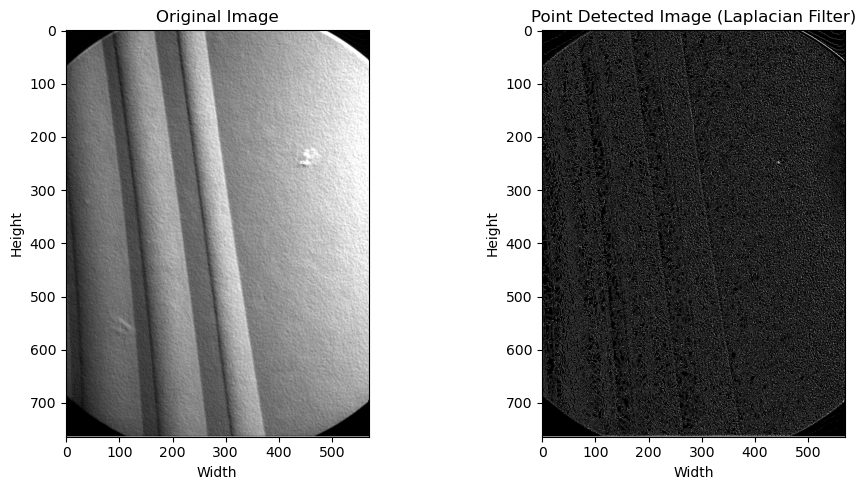

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
image = cv2.imread("point.png", cv2.IMREAD_GRAYSCALE)

# Define the Laplacian kernel for point detection
laplacian_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.float32)

# Apply the Laplacian filter using convolution
point_detected = cv2.filter2D(image, -1, laplacian_kernel)

# Plotting the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.xlabel("Width")
plt.ylabel("Height")

plt.subplot(1, 2, 2)
plt.imshow(point_detected, cmap='gray')
plt.title("Point Detected Image (Laplacian Filter)")
plt.xlabel("Width")
plt.ylabel("Height")

plt.tight_layout()
plt.show()
#--------------------------------------------------------------------------------------------------------------


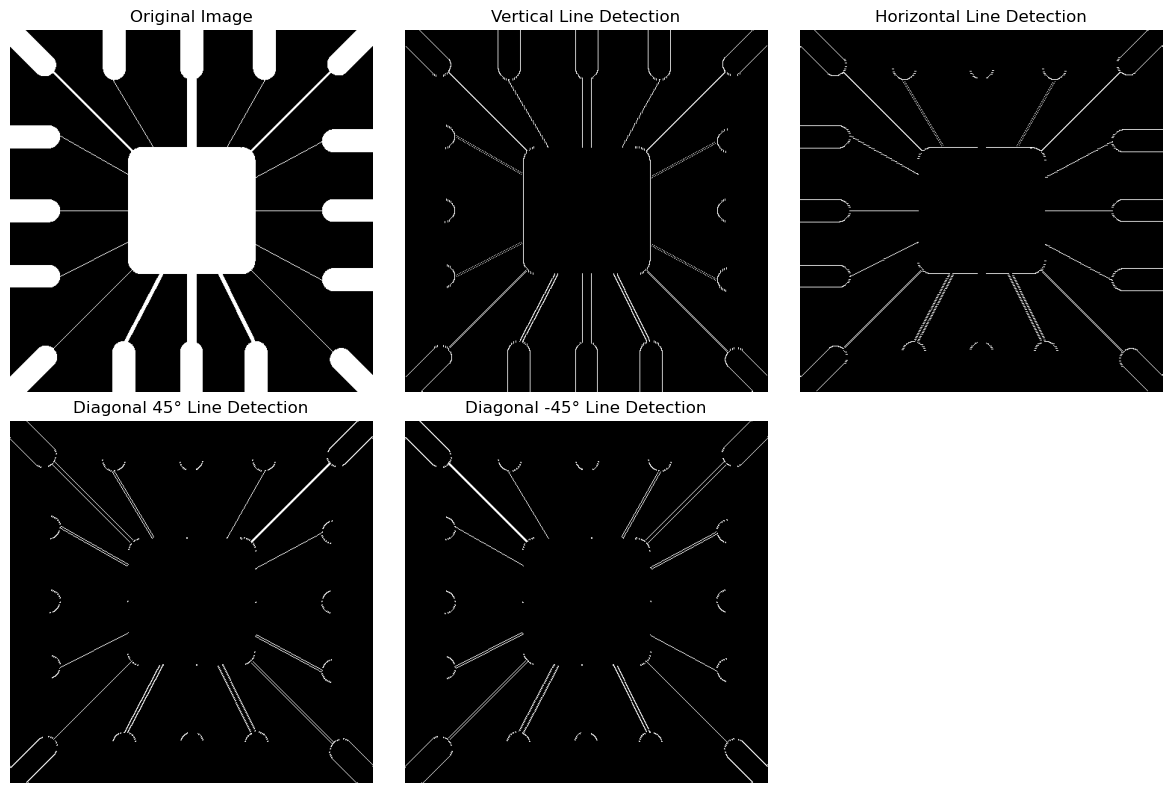

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread("line.png", cv2.IMREAD_GRAYSCALE)

# Define line detection kernels
vertical_kernel = np.array([
    [-1,  2, -1],
    [-1,  2, -1],
    [-1,  2, -1]
], dtype=np.float32)

horizontal_kernel = np.array([
    [-1, -1, -1],
    [ 2,  2,  2],
    [-1, -1, -1]
], dtype=np.float32)

diag_45_kernel = np.array([
    [-1, -1,  2],
    [-1,  2, -1],
    [ 2, -1, -1]
], dtype=np.float32)

diag_minus_45_kernel = np.array([
    [ 2, -1, -1],
    [-1,  2, -1],
    [-1, -1,  2]
], dtype=np.float32)

vertical_lines = cv2.filter2D(image, -1, vertical_kernel)
horizontal_lines = cv2.filter2D(image, -1, horizontal_kernel)
diag_45_lines = cv2.filter2D(image, -1, diag_45_kernel)
diag_minus_45_lines = cv2.filter2D(image, -1, diag_minus_45_kernel)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(vertical_lines, cmap='gray')
plt.title("Vertical Line Detection")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(horizontal_lines, cmap='gray')
plt.title("Horizontal Line Detection")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(diag_45_lines, cmap='gray')
plt.title("Diagonal 45° Line Detection")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(diag_minus_45_lines, cmap='gray')
plt.title("Diagonal -45° Line Detection")
plt.axis("off")

plt.tight_layout()
plt.show()
#------------------------------------------------------------------------------------------------------------------

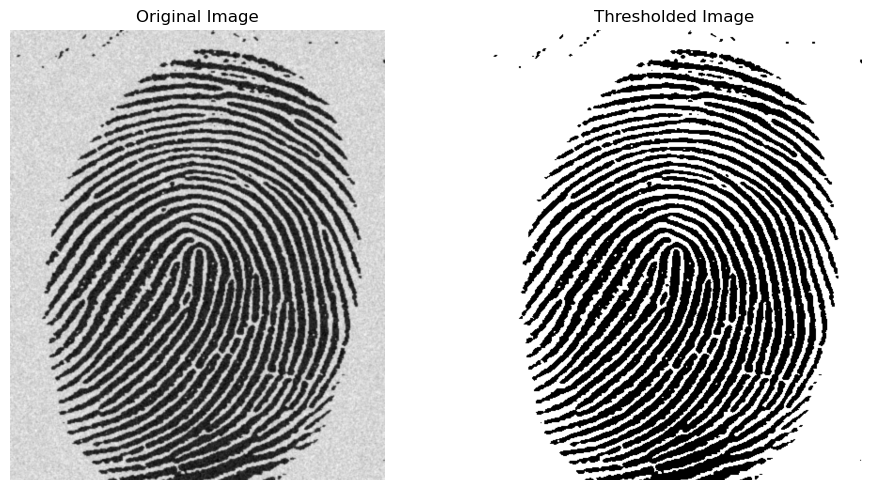

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def global_thresholding(image, deltaT):
    # Initialize threshold T to the average pixel intensity
    #automatic find global threshold
    T = np.mean(image)
     
    # Repeat until the difference between values of T in successive iterations is smaller than deltaT
    
    while True:
        # Segment the image using the current threshold value
        #Divide image pixels into two groups: g1 if pixel brighter than current threshold else g2
        G1 = image > T
        G2 = image <= T

        # Compute the average intensity values for the pixels in G1 and G2
        m1 = np.mean(image[G1])
        m2 = np.mean(image[G2])
        #above calculate mean brightness of 2 groups that we have just generate

        # Compute a new threshold value as the average of m1 and m2
        new_T = (m1 + m2) / 2.0
        #New threshold is average of the two means.

        # Check if the difference between T and new_T is smaller than deltaT
        if abs(T - new_T) < deltaT:
            break

        T = new_T

    # Apply the final threshold to the image
    thresholded_image = (image > T).astype('uint8') * 255
    #Convert the final thresholded result to 0 (black) and 255 (white).
    return thresholded_image

# Load the input image
image = cv2.imread('finger.png', cv2.IMREAD_GRAYSCALE)

# Set the thresholding parameter deltaT
deltaT = 0.01

# Apply global thresholding to the input image
thresholded_image = global_thresholding(image, deltaT)

# Display the original and thresholded images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.tight_layout()
plt.show()
#---------------------------------------------------------------------------------------------------------------------------


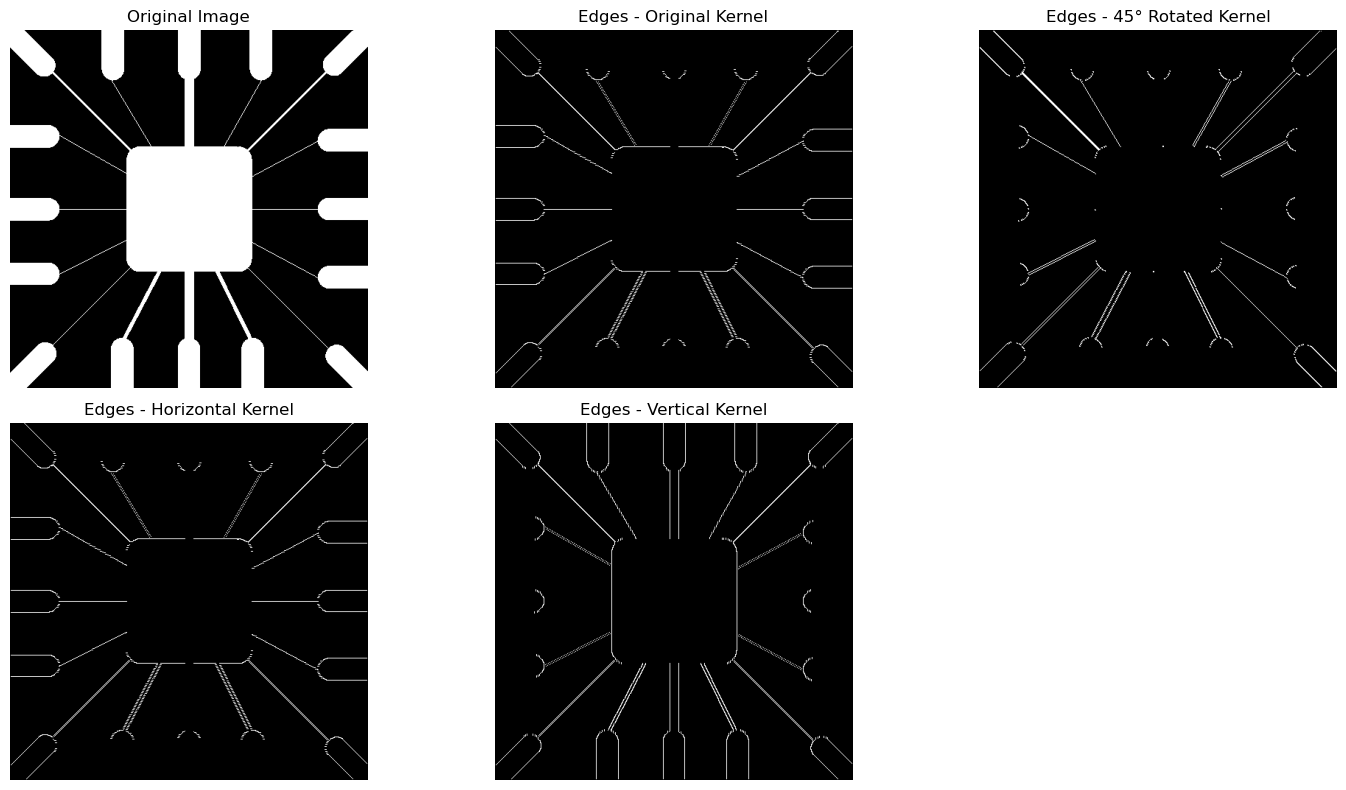

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('line.png', 0)

# Define the original kernel
kernel = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])

# Define the -45-degree rotated kernel
rot_kernel = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])

# Define the horizontal kernel
h_kernel = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])

# Define the vertical kernel
v_kernel = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])

# Get the dimensions of the image and the kernels
img_height, img_width = img.shape[:2]
kernel_height, kernel_width = kernel.shape[:2]

# Create new images to store the edges
edges_orig = np.zeros((img_height, img_width), dtype=np.uint8)
edges_rot = np.zeros((img_height, img_width), dtype=np.uint8)
edges_h = np.zeros((img_height, img_width), dtype=np.uint8)
edges_v = np.zeros((img_height, img_width), dtype=np.uint8)

# Loop over each pixel in the image
for i in range(1, img_height-1):
    for j in range(1, img_width-1):
        # Multiply the original kernel with the corresponding pixel values in the image
        sum_orig = 0
        for k in range(-1, kernel_height-1):
            for l in range(-1, kernel_width-1):
                sum_orig += img[i+k, j+l] * kernel[k+1, l+1]
        edges_orig[i,j] = np.clip(sum_orig, 0, 255)
        
        # Multiply the 45-degree rotated kernel with the corresponding pixel values in the image
        sum_rot = 0
        for k in range(-1, kernel_height-1):
            for l in range(-1, kernel_width-1):
                sum_rot += img[i+k, j+l] * rot_kernel[k+1, l+1]
        edges_rot[i,j] = np.clip(sum_rot, 0, 255)
        
        # Multiply the horizontal kernel with the corresponding pixel values in the image
        sum_h = 0
        for k in range(-1, kernel_height-1):
            for l in range(-1, kernel_width-1):
                sum_h += img[i+k, j+l] * h_kernel[k+1, l+1]
        edges_h[i,j] = np.clip(sum_h, 0, 255)
        
        # Multiply the vertical kernel with the corresponding pixel values in the image
        sum_v = 0
        for k in range(-1, kernel_height-1):
            for l in range(-1, kernel_width-1):
                sum_v += img[i+k, j+l] * v_kernel[k+1, l+1]
        edges_v[i,j] = np.clip(sum_v, 0, 255)

# Display the results using matplotlib
titles = ['Original Image', 'Edges - Original Kernel', 'Edges - 45° Rotated Kernel', 'Edges - Horizontal Kernel', 'Edges - Vertical Kernel']
images = [img, edges_orig, edges_rot, edges_h, edges_v]

plt.figure(figsize=(15, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
#---------------------------------------------------------------------------------------------------------------------

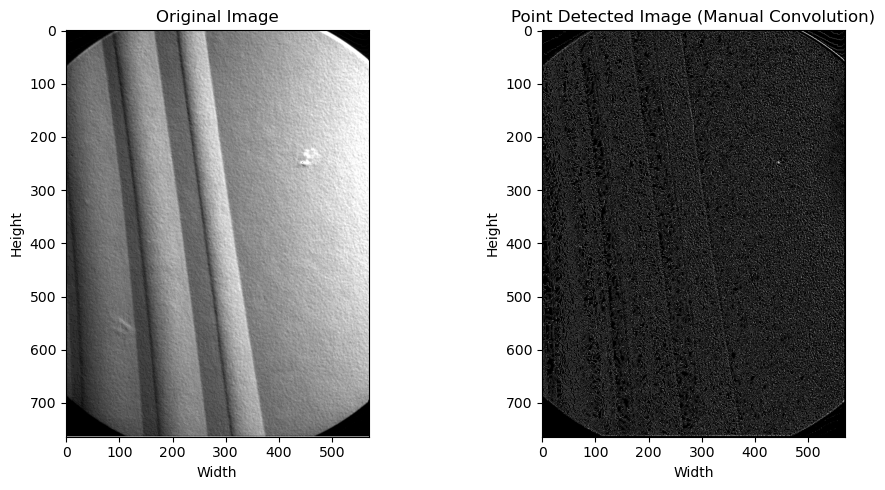

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
image = cv2.imread("point.png", cv2.IMREAD_GRAYSCALE)

# Define the Laplacian kernel for point detection
laplacian_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.int32)

# Get the image and kernel dimensions
img_height, img_width = image.shape
kernel_height, kernel_width = laplacian_kernel.shape

# Create an output image to store the result
point_detected = np.zeros((img_height, img_width), dtype=np.uint8)

# Perform convolution manually using nested loops
for i in range(1, img_height - 1):
    for j in range(1, img_width - 1):
        sum_val = 0
        for k in range(-1, 2):
            for l in range(-1, 2):
                sum_val += image[i + k, j + l] * laplacian_kernel[k + 1, l + 1]
        
        # Clip result to valid range [0, 255]
        point_detected[i, j] = np.clip(sum_val, 0, 255)

# Plot the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.xlabel("Width")
plt.ylabel("Height")

plt.subplot(1, 2, 2)
plt.imshow(point_detected, cmap='gray')
plt.title("Point Detected Image (Manual Convolution)")
plt.xlabel("Width")
plt.ylabel("Height")

plt.tight_layout()
plt.show()
#-------------------------------------------------------------------------------------------------------------